**Coronavirus disease 2019(COVID-19) is an infectious spreading disease,which is casued by severe acute respiratory syndrome coronavirus 2(SARS-Cov-2).This disease was first found in 2019 in Wuhan distirct of China, and is spreading tremendously across the globe,resulted in pandemic declaration by World Health Organization.**

### Symtoms of Corona Virus:-
**Generally People are sick from Day 1 to Day 14 before develpoing symptoms.Common symtoms for corona virus is:-** 
* Fever
* Dry Cough
* Tiredness
* In severe condition tends to difficulty in breathing

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

In [94]:
pd.set_option('display.max_rows',20000, 'display.max_columns',100)

## INDIA CORONA CASES ANALYSIS

In [95]:
df_carona_in_india = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_carona_india = pd.read_csv("../input/covid19-corona-virus-india-dataset/complete.csv")
df_ICMR = pd.read_csv("../input/covid19-in-india/ICMRTestingDetails.csv")
df_Individual = pd.read_csv("../input/covid19-in-india/IndividualDetails.csv")
df_Hospital = pd.read_csv("../input/covid19-in-india/HospitalBedsIndia.csv")
df_Age = pd.read_csv("../input/covid19-in-india/AgeGroupDetails.csv")
df_Italy = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_daily_US = pd.read_csv("../input/covid19-in-usa/us_states_covid19_daily.csv")
df_carona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1897,1898,13/05/20,8:00 AM,Telengana,-,-,830,32,1326
1898,1899,13/05/20,8:00 AM,Tripura,-,-,2,0,154
1899,1900,13/05/20,8:00 AM,Uttarakhand,-,-,46,1,69
1900,1901,13/05/20,8:00 AM,Uttar Pradesh,-,-,1873,82,3664
1901,1902,13/05/20,8:00 AM,West Bengal,-,-,612,198,2173


In [96]:
df_carona_india.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
1849,2020-05-12,Telengana,0,0,800,18.1124,79.0193,30,1275
1850,2020-05-12,Tripura,0,0,2,23.9408,91.9882,0,152
1851,2020-05-12,Uttar Pradesh,0,0,1758,26.8467,80.9462,80,3573
1852,2020-05-12,Uttarakhand,0,0,46,30.0668,79.0193,1,68
1853,2020-05-12,West Bengal,0,0,499,22.9868,87.8550,190,2063


In [97]:
#Total cases of carona in India
df_carona_in_india['Total Cases'] = df_carona_in_india['Cured'] + df_carona_in_india['Deaths'] + df_carona_in_india['Confirmed']
#Active cases of carona in India
df_carona_in_india['Active Cases'] = df_carona_in_india['Total Cases'] - df_carona_in_india['Cured'] - df_carona_in_india['Deaths']
df_carona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
1897,1898,13/05/20,8:00 AM,Telengana,-,-,830,32,1326,2188,1326
1898,1899,13/05/20,8:00 AM,Tripura,-,-,2,0,154,156,154
1899,1900,13/05/20,8:00 AM,Uttarakhand,-,-,46,1,69,116,69
1900,1901,13/05/20,8:00 AM,Uttar Pradesh,-,-,1873,82,3664,5619,3664
1901,1902,13/05/20,8:00 AM,West Bengal,-,-,612,198,2173,2983,2173


In [98]:
import matplotlib.pyplot as plt

In [99]:
#Till 8th April Cases in India
df1= df_carona_in_india[df_carona_in_india['Date']=='13/05/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Total Cases', color='Total Cases', height=600)
fig.update_layout(
    title='Till 8th April Total Cases in India')
fig.show()

In [100]:
#Till 8th April Active Cases in India
df1= df_carona_in_india[df_carona_in_india['Date']=='13/05/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Active Cases', color='Active Cases',barmode='group', height=600)
fig.update_layout(
    title='Till 13/05/20 Active Cases in India')
fig.show()

In [101]:
df_carona_in_india['Date'] =pd.to_datetime(df_carona_in_india.Date,dayfirst=True)
df_carona_in_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
1897,1898,2020-05-13,8:00 AM,Telengana,-,-,830,32,1326,2188,1326
1898,1899,2020-05-13,8:00 AM,Tripura,-,-,2,0,154,156,154
1899,1900,2020-05-13,8:00 AM,Uttarakhand,-,-,46,1,69,116,69
1900,1901,2020-05-13,8:00 AM,Uttar Pradesh,-,-,1873,82,3664,5619,3664
1901,1902,2020-05-13,8:00 AM,West Bengal,-,-,612,198,2173,2983,2173


In [102]:
#Daily Cases in India Datewise
carona_data = df_carona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index()#.sort_values('Total Cases',ascending = True)
carona_data.tail(10)

,Date,Total Cases
95,2020-05-04,55987
96,2020-05-05,61455
97,2020-05-06,65268
98,2020-05-07,70002
99,2020-05-08,74768
100,2020-05-09,79490
101,2020-05-10,84406
102,2020-05-11,90275
103,2020-05-12,95504
104,2020-05-13,101082


In [103]:
carona_data.shape

(105, 2)

In [104]:
carona_data['Daily Cases'] = carona_data['Total Cases'].sub(carona_data['Total Cases'].shift())
carona_data['Daily Cases'].iloc[0] = carona_data['Total Cases'].iloc[0]
carona_data['Daily Cases'] = carona_data['Daily Cases'].astype(int)
fig = px.bar(carona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=500)
fig.update_layout(
    title='Daily Cases in India Datewise')
fig.show()

In [105]:
carona_data['Corona Growth Rate'] = carona_data['Total Cases'].pct_change().mul(100).round(2)

In [106]:
#Corona Growth Rate Comparison with Previous Day
fig = px.bar(carona_data, y='Corona Growth Rate', x='Date',hover_data =['Corona Growth Rate','Total Cases'], height=500)
fig.update_layout(
    title='Corona Growth Rate(in Percentage) Comparison with Previous Day')
fig.show()
# print("hey")

In [107]:
#Total Cases in India State Datewise
carona_data = df_carona_in_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
fig = px.bar(carona_data, y='Total Cases', x='Date',hover_data =['State/UnionTerritory','Active Cases','Deaths','Cured'], color='Total Cases',barmode='group', height=700)
fig.update_layout(
    title='Indian States with Current Total Corona Cases')
fig.show()

In [108]:
df_carona_india.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
1849,2020-05-12,Telengana,0,0,800,18.1124,79.0193,30,1275
1850,2020-05-12,Tripura,0,0,2,23.9408,91.9882,0,152
1851,2020-05-12,Uttar Pradesh,0,0,1758,26.8467,80.9462,80,3573
1852,2020-05-12,Uttarakhand,0,0,46,30.0668,79.0193,1,68
1853,2020-05-12,West Bengal,0,0,499,22.9868,87.8550,190,2063


In [109]:
#Pie chart visualization of states effected by caronavirus
fig = px.pie(df_Age, values='TotalCases', names='AgeGroup')
fig.update_layout(
    title='Age Group affected with COVID-19')
fig.show()

In [110]:
# #Agewise Gender affected by COVID-19(There are lot of Nan Values)
# fig = px.histogram(df_Individual.dropna(), x="age",color ='gender')
# fig.update_layout(
#     title='Agewise Gender affected by COVID-19')
# fig.show()

In [111]:
# #Agewise Covid-19 patients in State(There are lot of Nan Values)
# fig = px.histogram(df_Individual.dropna(), x="age",color ='detected_state')
# fig.update_layout(
#     title='Agewise Covid-19 patients in State')
# fig.show()

In [112]:
#Genderwise current status of COVID-19(There are lot of Nan Values)
fig = px.histogram(df_Individual.dropna(), x="gender",color ='current_status')
fig.update_layout(
    title='Genderwise current status of COVID-19')
fig.show()

In [113]:
# #Total Cases Datewise of Foreign Nationals
# carona_data = df_carona_india.groupby(['Date','Name of State / UT','Total Confirmed cases ( Foreign National )'])['Total Confirmed cases','Cured/Discharged/Migrated',].sum().reset_index().sort_values('Total Confirmed cases ( Foreign National )',ascending = True)
# fig = px.bar(carona_data, y='Total Confirmed cases ( Foreign National )', x='Date',hover_data =['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated'], color='Total Confirmed cases ( Foreign National )', height=700)
# fig.update_layout(
#     title='Total Cases Datewise of Foreign Nationals')
# fig.show()

In [114]:
# #Total Cases Datewise of Indian Nationals
# carona_data = df_carona_india.groupby(['Date','Name of State / UT','Total Confirmed cases (Indian National)'])['Total Confirmed cases','Cured/Discharged/Migrated',].sum().reset_index().sort_values('Total Confirmed cases (Indian National)',ascending = True)
# fig = px.bar(carona_data, y='Total Confirmed cases (Indian National)', x='Date',hover_data =['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated'], color='Total Confirmed cases (Indian National)', height=700)
# fig.update_layout(
#     title='Total Cases Datewise of Indian  Nationals')
# fig.show()

In [115]:
df_population_of_india = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")
df_population_of_india.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [116]:
#Statewise Total Cases
df_new = df1.groupby(['State/UnionTerritory','Cured','Deaths','Active Cases'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
df_new.head()

,State/UnionTerritory,Cured,Deaths,Active Cases,Total Cases
19,Maharashtra,5125,921,24427,30473
10,Gujarat,3246,537,8903,12686
27,Tamil Nadu,2134,61,8718,10913
8,Delhi,2512,86,7639,10237
26,Rajasthan,2378,117,4126,6621


In [117]:
#Using Merge two join two diffrent data frames and then sorting them in ascending
df_population_with_carona_case = df_population_of_india.merge(df_new, left_on='State / Union Territory', right_on='State/UnionTerritory')
df_population_with_carona_case=df_population_with_carona_case.drop(labels=['State/UnionTerritory','Sno'],axis=1)
df_population_with_carona_case=df_population_with_carona_case.sort_values('Total Cases',ascending=False)
df_population_with_carona_case.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio,Cured,Deaths,Active Cases,Total Cases
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,5125,921,24427,30473
8,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,3246,537,8903,12686
5,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,2134,61,8718,10913
26,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868,2512,86,7639,10237
6,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,2378,117,4126,6621


In [118]:
#Pie chart visualization of states effected by caronavirus
fig = px.pie(df_population_with_carona_case, values='Total Cases', names='State / Union Territory')
fig.update_layout(
    title='Pie chart visualization of states effected by caronavirus')
fig.show()

In [119]:
#Latitude and Longitude of Indian State
df_with_utm = pd.read_csv("../input/utm-of-india/UTM ZONES of INDIA.csv")
df_with_utm.head()

,State / Union Territory,Latitude,Longitude
0,Uttar Pradesh,26.8467,80.9462
1,Maharashtra,19.7515,75.7139
2,Bihar,25.0961,85.3131
3,West Bengal,22.9868,87.8550
4,Madhya Pradesh,22.9734,78.6569


In [120]:
#Data of Population,Cases of Carona and UTM 
df_pop_caro_utm = df_population_with_carona_case.merge(df_with_utm , left_on='State / Union Territory', right_on='State / Union Territory')
df_pop_caro_utm.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio,Cured,Deaths,Active Cases,Total Cases,Latitude,Longitude
0,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,5125,921,24427,30473,19.7515,75.7139
1,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,3246,537,8903,12686,22.2587,71.1924
2,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,2134,61,8718,10913,11.1271,78.6569
3,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868,2512,86,7639,10237,28.7041,77.1025
4,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,2378,117,4126,6621,27.0238,74.2179


In [121]:
#Total Case in Indian States
fig = go.Figure(data=[go.Scatter(
    x=df_pop_caro_utm['State / Union Territory'][0:36],
    y=df_pop_caro_utm['Total Cases'][0:36],
    mode='markers',
    marker=dict(
        size=[100,90,80, 70, 60, 50, 40,35,35,35,35,35,35,35,35,35,35,30,28,28,25,25,20,15,15,15,15,10,10,10],
        showscale=True
        )
)])
fig.update_layout(
    title='Total Case in Indian States',
    xaxis_title="States",
    yaxis_title="Total Cases",
)
fig.show()

In [122]:
#Active Case in Indian States
fig = go.Figure(data=[go.Scatter(
    x=df_pop_caro_utm['State / Union Territory'][0:36],
    y=df_pop_caro_utm['Active Cases'][0:36],
    mode='markers',
    marker=dict(
        size=[100,90,80, 70, 60, 50, 40,35,35,35,35,35,35,35,35,35,35,30,28,28,25,25,20,15,15,15,15,10,10,10],
        showscale=True
        )
)])
fig.update_layout(
    title='Active Case in Indian States',
    xaxis_title="States",
    yaxis_title="Active Cases",
)
fig.show()

In [123]:
#Total Cases,Active Cases,Cured,Deaths from Corona Virus in India
carona_data = df_carona_in_india.groupby(['Date'])['Total Cases','Active Cases','Cured','Deaths'].sum().reset_index().sort_values('Date',ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Total Cases'],
                    mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Active Cases'], 
                mode='lines+markers',name='Active Cases'))
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Cured'], 
                mode='lines+markers',name='Cured'))
fig.add_trace(go.Scatter(x=carona_data['Date'], y=carona_data['Deaths'], 
                mode='lines+markers',name='Deaths'))
fig.update_layout(title_text='Curve Showing Different Cases from COVID-19 in India',plot_bgcolor='rgb(225,230,255)')
fig.show()

##  INDIAN COUNCIL OF MEDICAL RESEARCH(ICMR) REPORT TILL 13/05/20

The Indian Council of Research(ICMR) it is the biomedical research apex body in India, itis one of the oldest and largest medical bodies in the world it directly comes under **Ministry of Health and Family welfare Goverment Of India**.
According to ICMR Director-General, it has capacity to conduct 10,000 test per day and it gangs upto total 70,000 test per week.Subsequently ICMR is trying to increase the test per day to get the efficient results for testing **COVID-19**. They have added Goverment Labs and aswell as private labs to test get more test done through out India.

In [124]:
#Testing till 13/05/20
df_ICMR ['DateTime'] =pd.to_datetime(df_ICMR .DateTime,dayfirst=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalSamplesTested'],
                    mode='lines+markers',name='TotalSamplesTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalIndividualsTested'], 
                mode='lines+markers',name='TotalIndividualsTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalPositiveCases'], 
                mode='lines+markers',name='TotalPositiveCases'))
fig.update_layout(title_text='ICMR TEST for COVID-19',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [125]:
# #Current Status of Patient wrt state he/she is QUARTINE and his/her Nationality
# df_Individual = df_Individual.fillna({
#     'nationality': 'Unknown','current_status': 'Unknown'})
# df_Individual_new= df_Individual.drop(labels=['id','government_id','diagnosed_date','age','gender','detected_city','detected_district','status_change_date','notes'],axis=1)
# df_Individual_new = df_Individual.groupby(['current_status','nationality','detected_state'])['id'].count().reset_index(name='count')
# fig = px.bar(df_Individual_new, x='count', y='detected_state', orientation='h',hover_data =['current_status','nationality','detected_state'], color='current_status',height=700)
# fig.update_layout(
#     title='Current Status of Patient wrt state he/she is QUARTINE and his/her Nationality')
# fig.show()

## CORONA CASES in INDIA vs ITALY

In [126]:
#Total Confirmed Cases INDIA vs ITALY
df_Italy_p = pd.read_csv("../input/covid19-in-italy/covid19_italy_province.csv")
carona_data_ITALY = df_Italy_p.groupby(['Date'])['TotalPositiveCases'].sum().reset_index().sort_values('TotalPositiveCases',ascending = True)

carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date',ascending = True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data_ITALY['Date'], y=carona_data_ITALY['TotalPositiveCases'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Confirmed'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='Total Confirmed Cases INDIA vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [127]:
#COVID-19 Recovered Cases in INDIA Vs ITALY
df_Italy_r = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_Italy_r['Total Cases'] = df_Italy_r['HospitalizedPatients']+df_Italy_r['IntensiveCarePatients'] + df_Italy_r['TotalHospitalizedPatients'] + df_Italy_r['HomeConfinement'] + df_Italy_r['CurrentPositiveCases'] + df_Italy_r['NewPositiveCases'] + df_Italy_r['Recovered'] + df_Italy_r['Deaths'] + df_Italy_r['TotalPositiveCases']
carona_data_ITALY = df_Italy_r.groupby(['Date'])['Recovered'].sum().reset_index().sort_values('Date',ascending = True)
df_carona_in_india['Date'] =pd.to_datetime(df_carona_in_india.Date,dayfirst=True)
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Date',ascending = True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data_ITALY['Date'], y=carona_data_ITALY['Recovered'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Cured'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='COVID-19 Recovered Cases in INDIA Vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [128]:
#COVID-19 Death Cases in ITALY VS INDIA
df_Italy_r = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
df_Italy_r['Total Cases'] = df_Italy_r['HospitalizedPatients']+df_Italy_r['IntensiveCarePatients'] + df_Italy_r['TotalHospitalizedPatients'] + df_Italy_r['HomeConfinement'] + df_Italy_r['CurrentPositiveCases'] + df_Italy_r['NewPositiveCases'] + df_Italy_r['Recovered'] + df_Italy_r['Deaths'] + df_Italy_r['TotalPositiveCases']
carona_data_ITALY = df_Italy_r.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
df_carona_in_india['Date'] =pd.to_datetime(df_carona_in_india.Date,dayfirst=True)
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=carona_data_ITALY['Date'], y=carona_data_ITALY['Deaths'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Deaths'],
                    mode='lines+markers',name='India'))
fig.update_layout(title_text='COVID-19 Death Cases in INDIA Vs ITALY',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [129]:
#Daily Deaths in Italy
carona_data = df_Italy_r.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
carona_data['Daily Deaths'] = carona_data['Deaths'].sub(carona_data['Deaths'].shift())
carona_data['Daily Deaths'].iloc[0] = carona_data['Deaths'].iloc[0]
carona_data['Daily Deaths'] = carona_data['Daily Deaths'].astype(int)
fig = px.bar(carona_data, y='Daily Deaths', x='Date',hover_data =['Daily Deaths'], color='Daily Deaths', height=500)
fig.update_layout(
    title='DAILY DEATHS IN ITALY')
fig.show()

## CORONA CASES in INDIA vs USA

In [130]:
#Total Corona Cases INDIA vs USA
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Date',ascending = True)
carona_data_USA= df_daily_US.groupby(['dateChecked'])['positive'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=carona_data_USA['dateChecked'], y=carona_data_USA['positive'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Total Cases'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='Total Corona Cases INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [131]:
#COVID-19 Recovered Cases in INDIA vs USA
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Date',ascending = True)
carona_data_USA= df_daily_US.groupby(['dateChecked'])['recovered'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=carona_data_USA['dateChecked'], y=carona_data_USA['recovered'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Cured'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='COVID-19 Recovered Cases in INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [132]:
#COVID-19 Death Cases in INDIA vs USA
carona_data_INDIA =df_carona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Date',ascending = True)
carona_data_USA= df_daily_US.groupby(['dateChecked'])['death'].sum().reset_index().sort_values('dateChecked',ascending = True)
fig = go.Figure()

fig.add_trace(go.Scatter(x=carona_data_USA['dateChecked'], y=carona_data_USA['death'],
                    mode='lines+markers',name='USA'))

fig.add_trace(go.Scatter(x=carona_data_INDIA['Date'], y=carona_data_INDIA['Deaths'],
                    mode='lines+markers',name='India'))

fig.update_layout(title_text='COVID-19 Death Cases in INDIA vs USA',plot_bgcolor='rgb(225,230,255)')
fig.show()

In [133]:
#DAILY DEATHS IN USA
carona_data = df_daily_US.groupby(['dateChecked'])['death'].sum().reset_index().sort_values('death',ascending = True)
carona_data['Daily Cases'] = carona_data['death'].sub(carona_data['death'].shift())
carona_data['Daily Cases'].iloc[0] = carona_data['death'].iloc[0]
carona_data['Daily Cases'] = carona_data['Daily Cases'].astype(int)
fig = px.bar(carona_data, y='Daily Cases', x='dateChecked',hover_data =['Daily Cases'], color='Daily Cases', height=500)
fig.update_layout(
    title='DAILY DEATHS IN USA')
fig.show()

# Time Series

In [134]:
carona_data = df_carona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index()#.sort_values('Total Cases',ascending = True)
carona_data['Daily Cases'] = carona_data['Total Cases'].sub(carona_data['Total Cases'].shift())
carona_data['Daily Cases'].iloc[0] = carona_data['Total Cases'].iloc[0]
carona_data['Daily Cases'] = carona_data['Daily Cases'].astype(int)

x= carona_data['Date']
x.tail()

100   2020-05-09
101   2020-05-10
102   2020-05-11
103   2020-05-12
104   2020-05-13
Name: Date, dtype: datetime64[ns]

In [135]:
x= pd.DataFrame(x)
x['Daily Cases']=carona_data['Daily Cases']
x.tail()

,Date,Daily Cases
100,2020-05-09,4722
101,2020-05-10,4916
102,2020-05-11,5869
103,2020-05-12,5229
104,2020-05-13,5578


In [136]:
from datetime import date, timedelta

sdate = date(2020, 1, 30)   # start date
edate = date(2020, 5, 13) 

dd = [sdate + timedelta(days=x) for x in range((edate-sdate).days + 1)]

dd = pd.Series(dd)

dd = pd.to_datetime(dd)

In [137]:
x.set_index(dd, inplace=True)
print(x.index)

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-12', '2020-05-13'],
              dtype='datetime64[ns]', length=105, freq=None)


In [138]:
ts = x['Daily Cases']
ts.tail(10)

2020-05-04    3670
2020-05-05    5468
2020-05-06    3813
2020-05-07    4734
2020-05-08    4766
2020-05-09    4722
2020-05-10    4916
2020-05-11    5869
2020-05-12    5229
2020-05-13    5578
Name: Daily Cases, dtype: int64

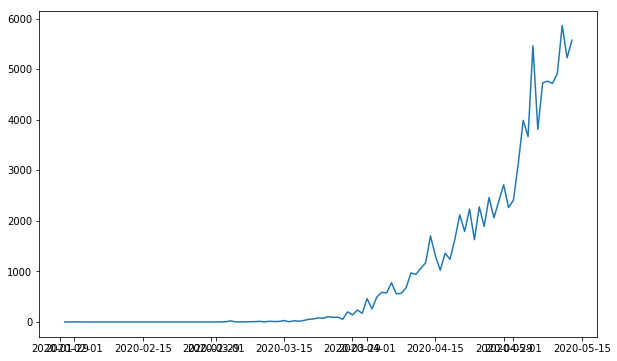

In [139]:
plt.figure(figsize=(10,6))
plt.plot(ts)

In [140]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
#Plot rolling statistics:
    plt.figure(figsize=(15,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

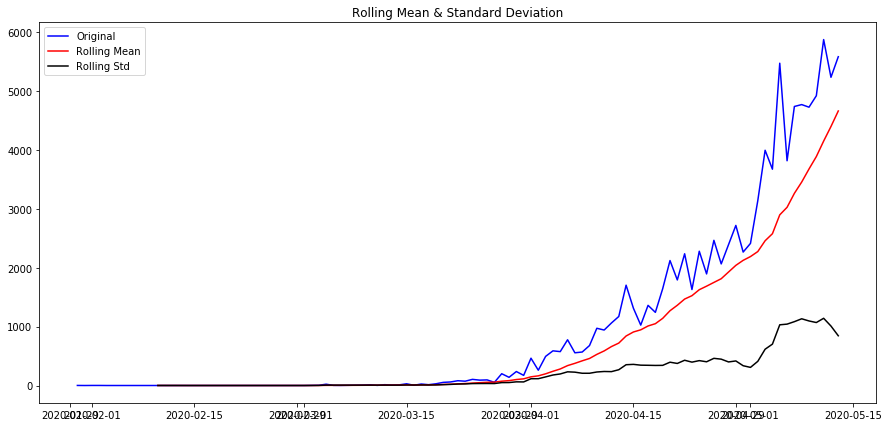

Results of Dickey-Fuller Test:
Test Statistic                  4.617738
p-value                         1.000000
#Lags Used                     12.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


In [141]:
test_stationarity(ts)

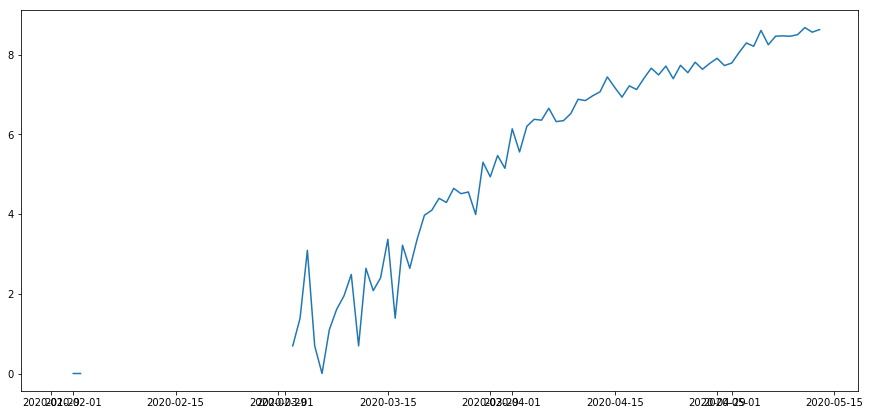

In [142]:
ts_log=np.log(ts)
plt.figure(figsize=(15,7))
plt.plot(ts_log)

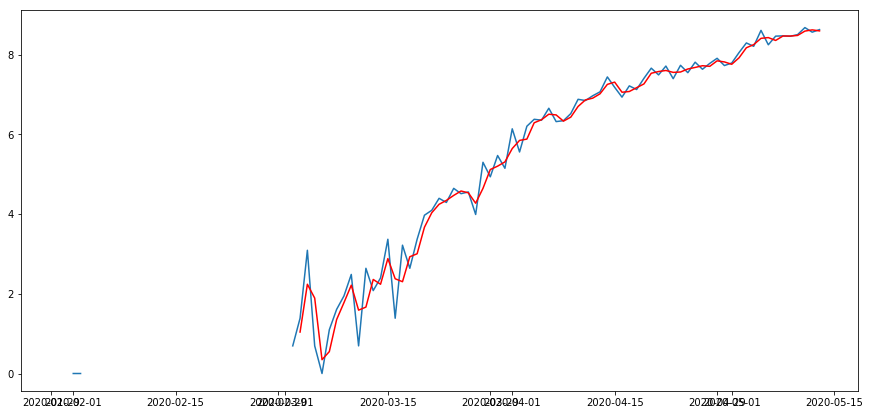

In [143]:
moving_avg = pd.Series(ts_log).rolling(window=2).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [144]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

2020-01-30    NaN
2020-01-31    NaN
2020-02-01    NaN
2020-02-02    0.0
2020-02-03    NaN
2020-02-04    NaN
2020-02-05    NaN
2020-02-06    NaN
2020-02-07    NaN
2020-02-08    NaN
Name: Daily Cases, dtype: float64

In [145]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

2020-02-02    0.000000
2020-03-03    0.346574
2020-03-04    0.852374
2020-03-05   -1.198948
2020-03-06   -0.346574
Name: Daily Cases, dtype: float64

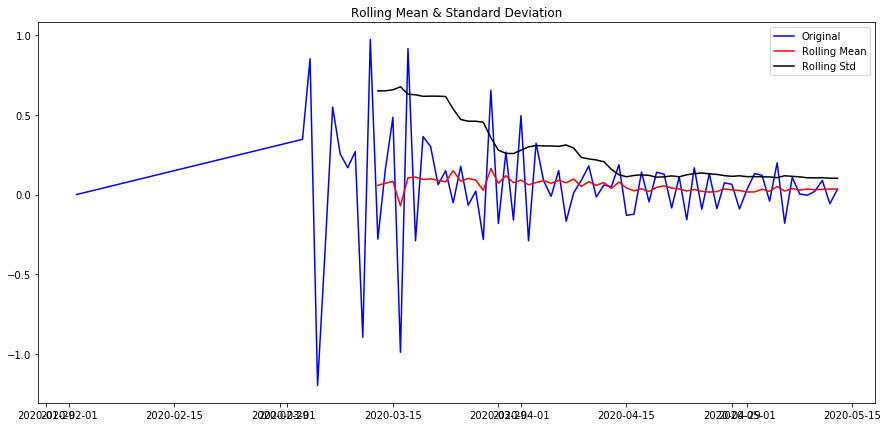

Results of Dickey-Fuller Test:
Test Statistic                 -1.444275
p-value                         0.560876
#Lags Used                     10.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [146]:
test_stationarity(ts_log_moving_avg_diff)

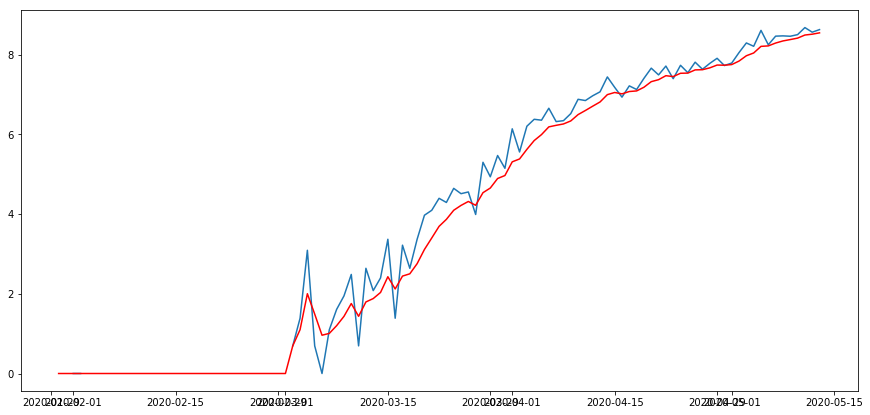

In [147]:
expwighted_avg = ts_log.ewm(halflife=2).mean()
plt.figure(figsize=(15,7))
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

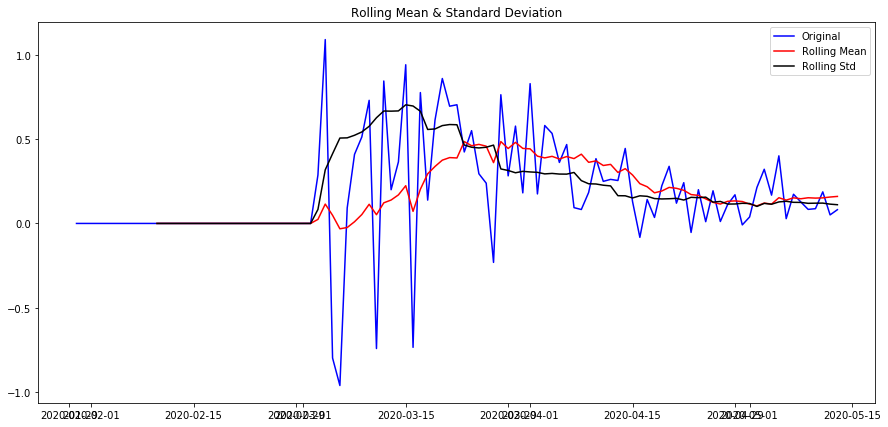

Results of Dickey-Fuller Test:
Test Statistic                 -2.124475
p-value                         0.234788
#Lags Used                      5.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [148]:
from numpy import inf

ts_log[ts_log == -inf] = 0

ts_log_ewma_diff = ts_log - expwighted_avg



test_stationarity(ts_log_ewma_diff)

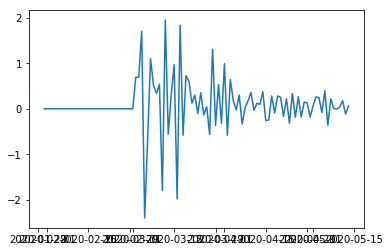

In [149]:
ts_log_diff = ts_log - ts_log.shift()

plt.plot(ts_log_diff)

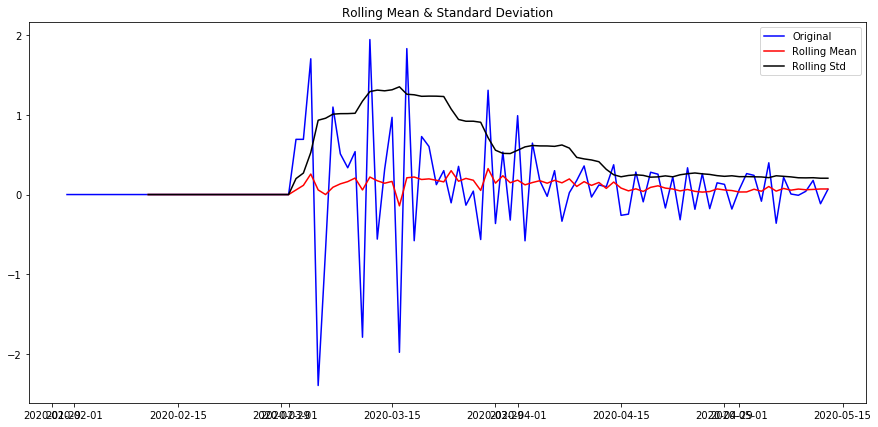

Results of Dickey-Fuller Test:
Test Statistic                -9.050794e+00
p-value                        4.846232e-15
#Lags Used                     3.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [150]:
ts_log_diff.dropna(inplace=True)

test_stationarity(ts_log_diff)

In [151]:
ts_log = pd.Series(ts_log)

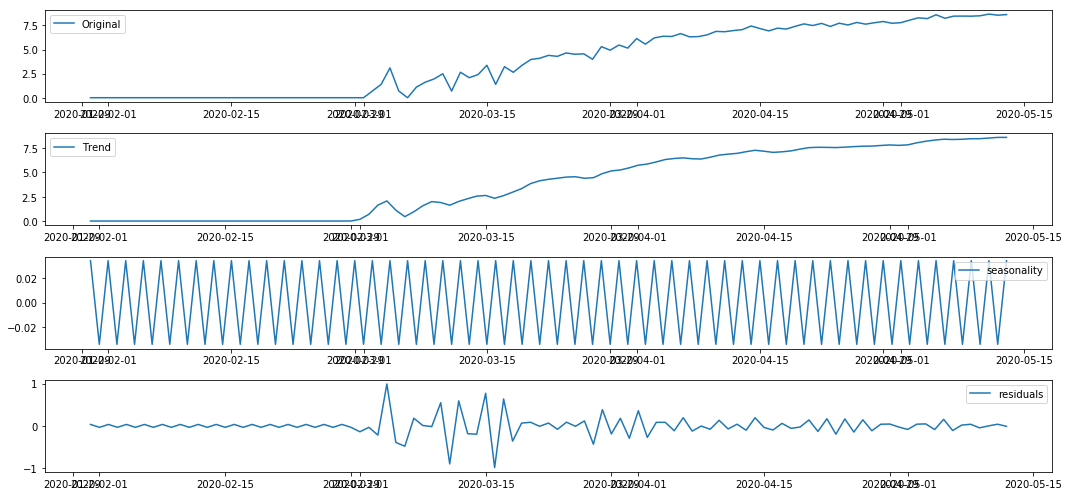

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(15,7))
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

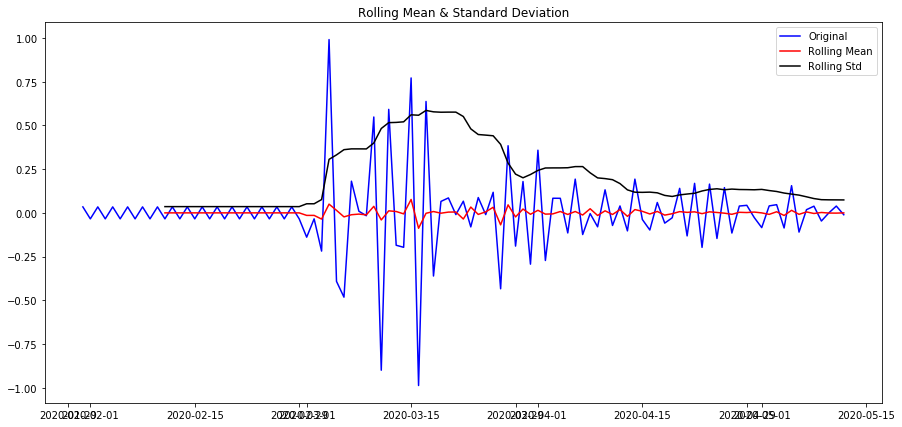

Results of Dickey-Fuller Test:
Test Statistic                -6.039424e+00
p-value                        1.357197e-07
#Lags Used                     1.100000e+01
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64


In [153]:
ts_log_decompose = residual #trend#residual needs to be used for modelling
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

In [154]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20,method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

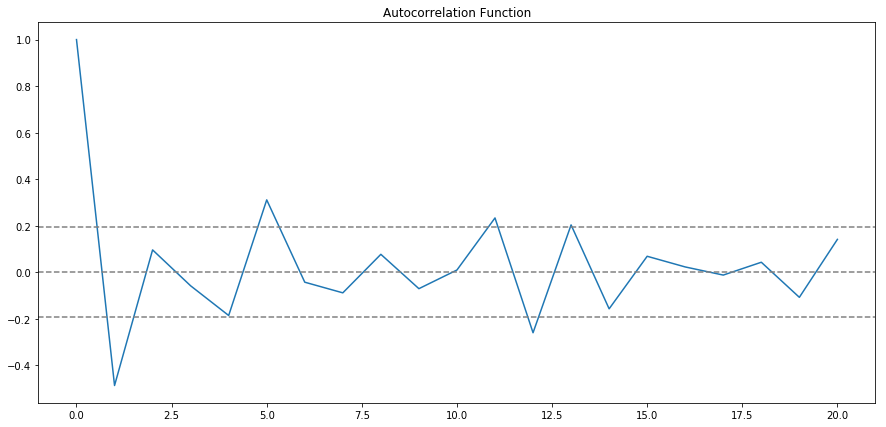

In [155]:
#plot ACF

plt.figure(figsize=(15,7))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Autocorrelation Function')



Text(0.5, 1.0, 'Partial Autocorrelation Function')

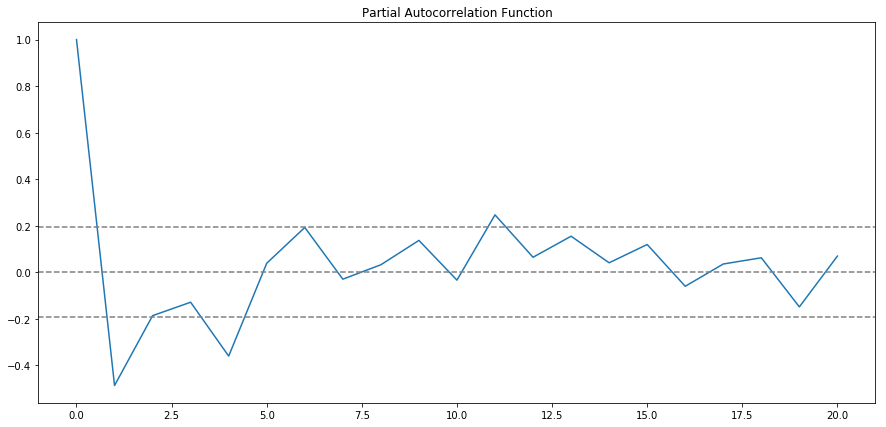

In [156]:
plt.figure(figsize=(15,7))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')

Optimization terminated successfully.
         Current function value: 0.556630
         Iterations: 23
         Function evaluations: 46
         Gradient evaluations: 46


Text(0.5, 1.0, 'RSS: nan')

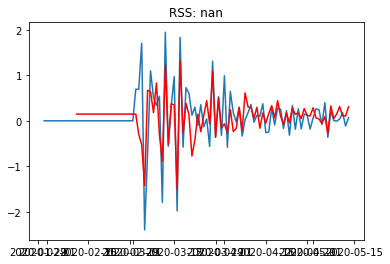

In [173]:
model = ARIMA(ts_log,order=(11,1,0))
results_AR = model.fit(method='css',solver='cg')
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Optimization terminated successfully.
         Current function value: 0.549006
         Iterations: 76
         Function evaluations: 82
         Gradient evaluations: 82


Text(0.5, 1.0, 'RSS: 18.2566')

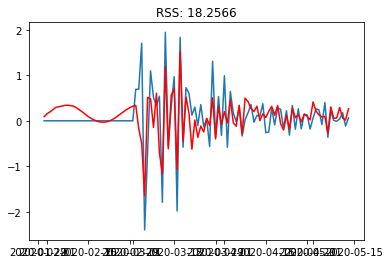

In [174]:
model = ARIMA(ts_log,order=(0,1,11))
results_MA = model.fit(method='css',solver='bfgs')
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 18.7846')

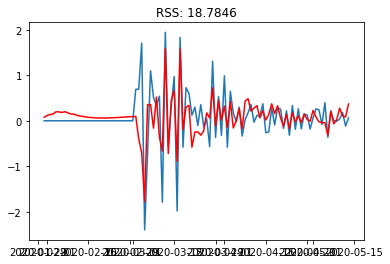

In [175]:
model = ARIMA(ts_log,order=(6,1,6))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [160]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues,copy=True)
# print(predictions_ARIMA_diff)

In [161]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()
# print(predictions_ARIMA_diff_cum_sum.head())

In [162]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
# predictions_ARIMA_log.head()

Text(0.5, 1.0, 'RMSE: 967.5070')

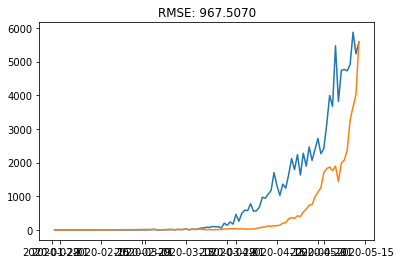

In [163]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [164]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Daily Cases   No. Observations:                  104
Model:                ARIMA(12, 1, 0)   Log Likelihood                 -57.521
Method:                           css   S.D. of innovations              0.452
Date:                Wed, 13 May 2020   AIC                            143.043
Time:                        07:34:18   BIC                            178.348
Sample:                    02-12-2020   HQIC                           157.292
                         - 05-13-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0958      0.031      3.060      0.002       0.034       0.157
ar.L1.D.Daily Cases     -0.6604      0.104     -6.341      0.000      -0.865      -0.456
ar.L2.D.Daily Cases     -0.3353      0.121     -2.767      0.006      -0.573      -0.098
ar.L3.D.Daily Cases     -0.3719      0.125     -2.977      0.003      -0.617      -0.127
ar.L4.D.Daily Cases     -0.3282      0.129     -2.548      0.011      -0.581      -0.076
ar.L5.D.Daily Cases      0.1203      0.131      0.916      0.360      -0.137       0.378
ar.L6.D.Daily Cases      0.1279      0.131      0.973      0.330      -0.130       0.385
ar.L7.D.Daily Cases      0.0626      0.131      0.479      0.632      -0.194       0.319
ar.L8.D.Daily Cases      0.1919      0.130      1.480      0.139      -0.062       0.446
ar.L9.D.Daily Cases      0.1970      0.127      1.549      0.121      -0.052       0.446
ar.L10.D.Daily Cases     0.1379      0.124      1.116      0.264      -0.104       0.380
ar.L11.D.Daily Cases     0.2850      0.120      2.376      0.018       0.050       0.520
ar.L12.D.Daily Cases     0.0639      0.104      0.614      0.539      -0.140       0.268
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1158           -0.0000j            1.1158           -0.0000
AR.2             0.8592           -0.7764j            1.1580           -0.1170
AR.3             0.8592           +0.7764j            1.1580            0.1170
AR.4             0.3831           -1.0229j            1.0922           -0.1930
AR.5             0.3831           +1.0229j            1.0922            0.1930
AR.6            -0.1553           -1.2059j            1.2159           -0.2704
AR.7            -0.1553           +1.2059j            1.2159            0.2704
AR.8            -0.7614           -0.7543j            1.0717           -0.3757
AR.9            -0.7614           +0.7543j            1.0717            0.3757
AR.10           -1.0764           -0.3294j            1.1256           -0.4527
AR.11           -1.0764           +0.3294j            1.1256            0.4527
AR.12           -4.0756           -0.0000j            4.0756           -0.5000
------------------------------------------------------------------------------
"""

# Future Predictions

In [165]:
sdate = date(2020, 5, 14)   # start date
edate = date(2020, 6, 14) 

dd = [sdate + timedelta(days=x) for x in range((edate-sdate).days + 1)]

dd = pd.Series(dd)

dd = pd.to_datetime(dd)

dd =  pd.DataFrame(dd)

# via arima

In [166]:
X = dd.values

forecast = results_AR.predict(start=sdate,
                                end=edate,)

# via Prophet

In [167]:
from fbprophet import Prophet
confirmed = x
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.95,daily_seasonality=True,
           seasonality_mode= 'multiplicative')
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

,ds
130,2020-06-08
131,2020-06-09
132,2020-06-10
133,2020-06-11
134,2020-06-12


In [168]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
130,2020-06-08,10679.181951,9651.159829,11614.990619
131,2020-06-09,11246.718714,10235.645300,12239.542873
132,2020-06-10,10353.842076,9304.288150,11396.552652
133,2020-06-11,10004.861698,9013.379500,11005.295695
134,2020-06-12,10414.676988,9374.281934,11450.373066


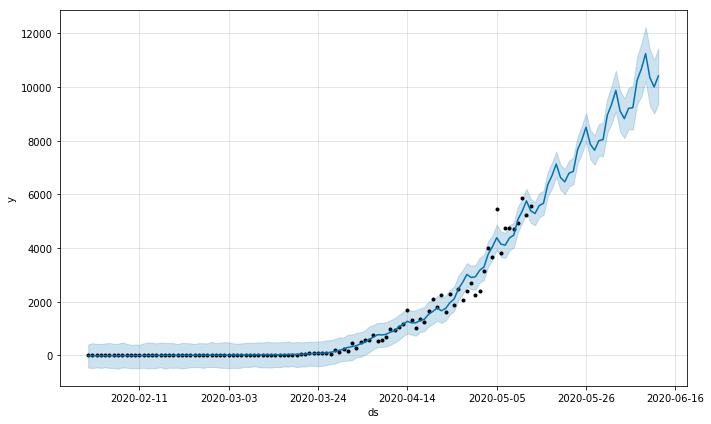

In [169]:
confirmed_forecast_plot = m.plot(forecast)

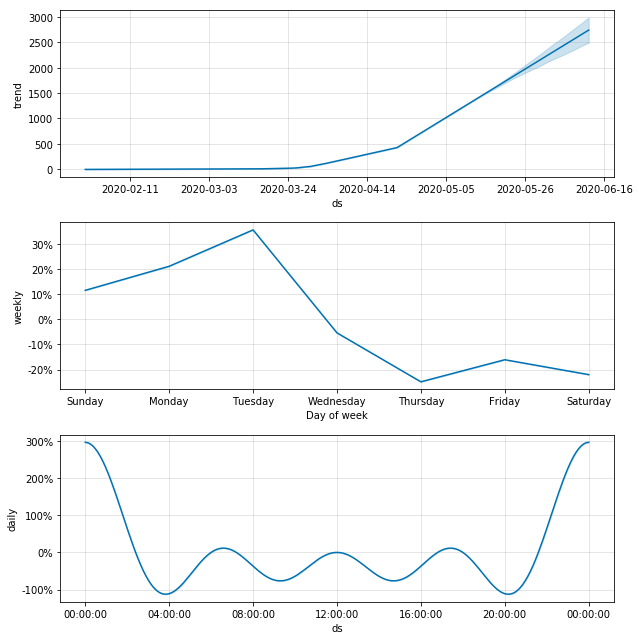

In [170]:
forecast_components = m.plot_components(forecast)

# Kindly Upvote and leave comments if you have any queries